In [1]:
from sklearn.datasets import load_diabetes

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import time

In [2]:
X,y = load_diabetes(return_X_y=True)


In [3]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [4]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [5]:
print(reg.coef_)
print(reg.intercept_)

[  -9.16088483 -205.46225988  516.68462383  340.62734108 -895.54360867
  561.21453306  153.88478595  126.73431596  861.12139955   52.41982836]
151.88334520854633


In [6]:
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)

0.4399387660024645

In [18]:
class SGDRegressor:
    
    def __init__(self,learning_rate=0.01,epochs=100):
        
        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs
        
    def fit(self,X_train,y_train):
        # init your coefs
        self.intercept_ = 0
        self.coef_ = np.ones(X_train.shape[1])
        
        for i in range(self.epochs):
            for j in range(X_train.shape[0]):
                idx = np.random.randint(0,X_train.shape[0])
                
                y_hat = np.dot(X_train[idx],self.coef_) + self.intercept_
                
                intercept_der = -2 * (y_train[idx] - y_hat)
                self.intercept_ = self.intercept_ - (self.lr * intercept_der)
                
                coef_der = -2 * np.dot((y_train[idx] - y_hat),X_train[idx])
                self.coef_ = self.coef_ - (self.lr * coef_der)
        
        print(self.intercept_,self.coef_)
    
    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + self.intercept_

In [19]:
sgd = SGDRegressor(learning_rate=0.01,epochs=40)

In [20]:
start = time.time()
sgd.fit(X_train,y_train)
print("The time taken is",time.time() - start)

148.89252413108295 [  56.96497244  -46.14474889  319.26263835  230.9433631    27.154203
  -10.62803764 -159.70990609  126.62917344  283.92151923  134.88842675]
The time taken is 0.276017427444458


In [21]:
y_pred = sgd.predict(X_test)

In [22]:
r2_score(y_test,y_pred)

0.4199736964873002

In [7]:
from sklearn.linear_model import SGDRegressor

In [8]:
reg = SGDRegressor(max_iter=100,learning_rate='constant',eta0=0.01)

In [9]:
reg.fit(X_train,y_train)

SGDRegressor(learning_rate='constant', max_iter=100)

In [10]:
y_pred = reg.predict(X_test)

In [11]:
r2_score(y_test,y_pred)


0.43066870093685405

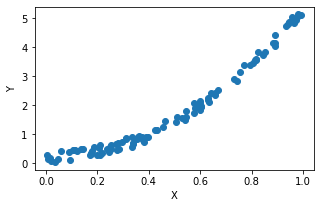